# Projeto Aplicado
> <p style='text-align: justify;'><font size=3.0>Curso de Estatística para Ciência de Dados e Business Analytics</font></p>

## Conjunto de dados

<font size=4.5><b>Pesquisa Nacional por Amostra de Domicílios - 2015</b></font>

<p style='text-align: justify;'><font size=3.5>A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> tinha periodicidade anual e pequisava, de forma permanente, características gerais da população como educação, trabalho, rendimento e habitação e outras. O levantamento dessas estatísticas constituiu, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil. A PNAD foi  encerrada em 2016 e substituída, com metodologia atualizada, pela Pesquisa Nacional por Amostra de Domicílios Contínua - PNAD Contínua.</font></p>

<font size=2><b>Fonte dos dados</b>: https://www.ibge.gov.br/estatisticas/sociais/educacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados</font>

## Dicionário dos dados

> **Renda**: rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.
> ***
> **Idade**: idade do morador na data de referência em anos.
> ***
> **Estado**:
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> **Sexo biológico**	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> **Anos de Estudo**
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> **Raça**
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### Observação
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from scipy.stats import probplot, normaltest
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

%run mapaVariaveis.py

## Carregamento dos dados

In [2]:
df = pd.read_csv('dataset/dados.csv', header=0, names=['Estado', 'Sexo biologico', 'Idade', 'Raca', 'Anos de Estudo', 'Renda'])
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.head(5)

Linhas: 76840 | Colunas: 6


,Estado,Sexo biologico,Idade,Raca,Anos de Estudo,Renda
0,11,0,23,8,12,800
1,11,1,23,2,12,1150
2,11,1,35,8,15,880
3,11,0,46,2,6,3500
4,11,1,47,8,9,150


## Informação dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Estado          76840 non-null  int64
 1   Sexo biologico  76840 non-null  int64
 2   Idade           76840 non-null  int64
 3   Raca            76840 non-null  int64
 4   Anos de Estudo  76840 non-null  int64
 5   Renda           76840 non-null  int64
dtypes: int64(6)
memory usage: 3.5 MB


## Comportamento variável Renda

<p style='text-align: justify;'><font size=2.85>Para avaliar o comportamento da variável RENDA, foi construida uma tabela de frequências considerando as seguintes classes em salários mínimos:</font></p>

<b>A</b> ► <font size=2.85>Acima de 25 SM</font>

<b>B</b> ► <font size=2.85>De 15 a 25 SM</font>

<b>C</b> ► <font size=2.85>De 5 a 15 SM</font>

<b>D</b> ► <font size=2.85>De 2 a 5 SM</font>

<b>E</b> ► <font size=2.85>Até 2 SM</font>

<p style='text-align: justify;'><font size=2.85>O salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.</font></p>

Tabela de frequência

In [4]:
print('Intevalos das classes: de %s até %s reais' % (df['Renda'].min(), df['Renda'].max()))
classes = [df['Renda'].min(), 1576, 3940, 11820, 19700, df['Renda'].max()]

labels = ['E', 'D', 'C', 'B', 'A']
frequencia = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True))

Intevalos das classes: de 0 até 200000 reais


Coluna de percentuais

In [5]:
percentual = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True)
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})

Gráfico de barras

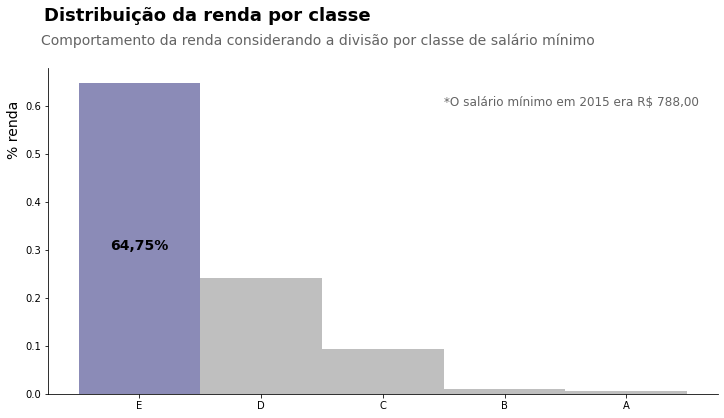

In [6]:
suptitle = 'Distribuição da renda por classe'
title = 'Comportamento da renda considerando a divisão por classe de salário mínimo'
aviso = '*O salário mínimo em 2015 era R$ 788,00'
colors=['#191970', '#808080', '#808080', '#808080', '#808080']

dist_freq['Percentual (%)'].plot.bar(width=1, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% renda', fontsize=14, horizontalalignment='left', y=0.72)
plt.grid(False)
plt.text(0, 0.3, '64,75%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(2.5, 0.6, aviso, fontsize=12, horizontalalignment='left', color='#646464')
plt.show()

<p style='text-align: justify;'><font size=2.85>Cerca de 65% dos entrevistados pertenciam a classe E, ou seja, possuiam uma renda de até 2 salários mínimos (1576 reais).</font></p>

## Histogramas

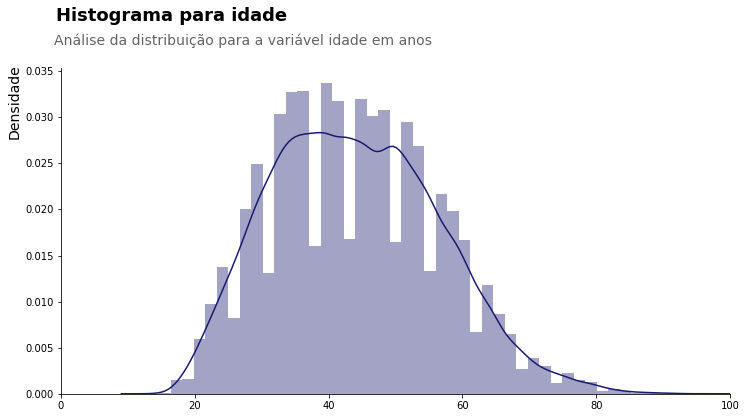

In [7]:
suptitle = 'Histograma para idade'
title = 'Análise da distribuição para a variável idade em anos'

ax = sns.distplot(df['Idade'], kde=True, color='#191970')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Densidade', fontsize=14, horizontalalignment='left', y=0.78)
ax.set_xlabel(None)
ax.spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlim(0, 100)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=2.85>A variável idade possui muitos picos e vales e uma curva parecida com a normal. Existe uma grande variação, temos de pessoas de 13 a 99 anos. È uma distribuição assimétrica à direita.</font></p>

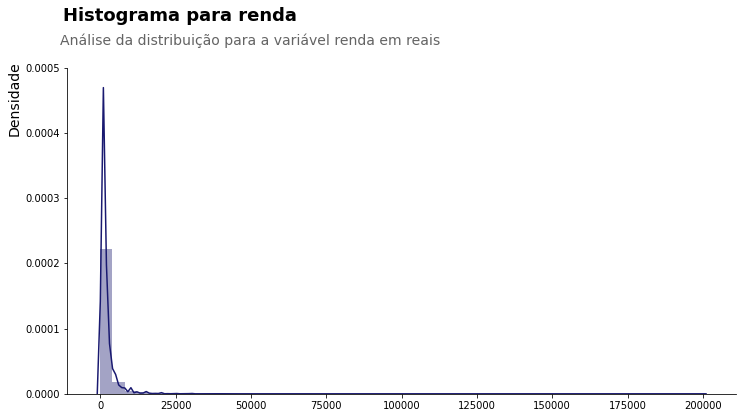

In [8]:
suptitle = 'Histograma para renda'
title = 'Análise da distribuição para a variável renda em reais'

ax = sns.distplot(df['Renda'], kde=True, color='#191970')
ax.figure.set_size_inches(12, 6)
ax.set_xlabel(None)
ax.set_ylabel('Densidade', fontsize=14, horizontalalignment='left', y=0.79)
ax.spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylim(0.0000, 0.0005)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=2.85>A variável Renda possui uma assimetria à direita, o que indica que boa parte das pessoas que compõe essa base recebem salários mais baixos. Podemos ver também a existência de alguns valores mais altos.</font></p>

## Análise descritiva para a variável Renda

In [9]:
sample = df.drop(['Estado', 'Sexo biologico', 'Raca'], axis=1)
sample['Anos de Estudo'] = sample['Anos de Estudo'].map(map_anos_estudos)
sample.describe().round(2)

,Idade,Anos de Estudo,Renda
count,76840.00,76840.00,76840.00
mean,44.07,8.43,2000.38
std,12.48,4.54,3323.39
min,13.00,0.00,0.00
25%,34.00,5.00,788.00
50%,43.00,9.00,1200.00
75%,53.00,11.00,2000.00
max,99.00,15.00,200000.00


<p style='text-align: justify;'><font size=2.85>A idade média é de 44 anos com uma variação de 12,5 anos. A idade varia entre 13 e 99 anos e os anos passados na escola eram, em média, 8 com 25% da nossa amostra tendo estudado 5 anos ou menos.</font></p>
<p style='text-align: justify;'><font size=2.85>A renda média das famílias, em 2015, era de 2000,38 reais com uma variação de 3323,38 reais. Metade da nossa amostra recebia até 1.5 salário mínimo e cerca de 19.210 pessoas viviam com 1 salário minimo ou menos.</font></p>

## Renda por raça e sexo biológico

<p style='text-align: justify;'><font size=2.85>Na nossa amostra, para cada 2.257 homens chefes de família, há 1 mulher. Por isso, para mantermos uma comparação justa, usaremos uma amostra aleatória equilibrada de 10000 instâncias para cada sexo biológico.</font></p>

In [10]:
sample = df.groupby('Sexo biologico').apply(lambda x : x.sample(n=10000, replace=False))

analise_renda = pd.crosstab(sample['Raca'], sample['Sexo biologico'], values=sample['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
analise_renda.rename(index=raca, inplace=True)
analise_renda.rename(columns=sexo_biologico, inplace=True)
analise_renda.round(2)

max                mean             median           \
Sexo biologico Masculino  Feminino Masculino Feminino Masculino Feminino   
Raca                                                                       
Indígena          7000.0    6000.0    977.85  1242.66     794.0    788.0   
Branca          100000.0  100000.0   2896.02  2104.04    1700.0   1200.0   
Preta            15000.0   15000.0   1484.46  1133.71    1182.0    800.0   
Amarela          15000.0   11000.0   4248.28  2711.38    3100.0   1576.0   
Parda            30000.0   30000.0   1619.88  1186.48    1180.0    800.0   

                     std           
Sexo biologico Masculino Feminino  
Raca                               
Indígena         1118.96  1568.07  
Branca           4095.22  3237.73  
Preta            1346.33  1254.36  
Amarela          3372.69  2684.03  
Parda            1887.23  1581.15

<p style='text-align: justify;'><font size=2.85>Homens indígenas e mulheres negras eram o grupo que possuem a renda média mais baixa. Analisado a mediana, percebemos que, em geral, os homens possuiam renda superior a das mulheres.</font></p>

## Renda por anos de estudo e sexo biológico

In [11]:
analise_renda_2 = pd.crosstab(sample['Anos de Estudo'], sample['Sexo biologico'], values=sample['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
analise_renda_2.rename(index=anos_de_estudo, inplace=True)
analise_renda_2.rename(columns=sexo_biologico, inplace=True)
analise_renda_2.round(2)

max                mean           \
Sexo biologico                 Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    814.67   545.19   
1 ano                             3500.0    2000.0    893.38   541.79   
2 anos                           15000.0    4000.0    913.98   561.24   
3 anos                           15000.0    3500.0   1073.24   541.30   
4 anos                           16000.0   10000.0   1234.99   708.13   
5 anos                           30000.0    7880.0   1334.08   781.25   
6 anos                            8600.0    6000.0   1350.24   834.68   
7 anos                            7800.0    9000.0   1421.40   837.10   
8 anos                           12000.0   18000.0   1620.24   971.69   
9 anos                            5000.0    3500.0   1408.00   815.02   
10 anos                          15000.0    5000.0   1670.20   941.37   
11 anos                          23500.0  100000.0   2044.29  1308.73   
12 anos                          30000.0   15580.0   2530.18  1461.06   
13 anos                          20000.0   20000.0   3305.22  2054.23   
14 anos                          30000.0   15000.0   3693.75  2149.35   
15 anos ou mais                 100000.0   33000.0   5969.55  3823.94   
Não determinados                  7000.0    3000.0   2131.06   801.19   

                                  median                std           
Sexo biologico                 Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     650.0    400.0   1340.42   678.99  
1 ano                              788.0    450.0    685.80   472.49  
2 anos                             788.0    450.0   1355.44   583.44  
3 anos                             890.0    500.0   1136.84   444.40  
4 anos                            1000.0    788.0   1042.69   676.53  
5 anos                            1000.0    788.0   1579.31   635.20  
6 anos                            1200.0    788.0    980.84   598.22  
7 anos                            1200.0    788.0   1028.95   683.51  
8 anos                            1300.0    800.0   1217.60   943.42  
9 anos                            1200.0    788.0    845.21   556.04  
10 anos                           1200.0    850.0   1491.28   591.14  
11 anos                           1500.0   1000.0   1699.18  2325.12  
12 anos                           1800.0   1150.0   2771.79  1479.22  
13 anos                           2500.0   1375.0   2830.02  2479.06  
14 anos                           2990.0   1600.0   3477.61  1853.17  
15 anos ou mais                   4000.0   2700.0   6313.34  3740.15  
Não determinados                  1900.0    788.0   1601.94   571.43

<p style='text-align: justify;'><font size=2.85>Como regra geral, quanto mais anos de estudo, maior é a média salarial. Percebemos que, a média salarial dos homens era superior a das mulheres para todos os níveis de escolaridade e existem casos em que, mesmo com mais anos de estudos, o salário das mulheres era inferior ao de homens com menos instrução.</font></p> <p style='text-align: justify;'>
    
<font size=2.85>Por exemplo, uma mulher que estudou 6 anos recebia um valor médio inferior a de homens com 2 anos de instrução. Pela mediana, ambos passam a receber o mesmo valor de 1 salário mínimo. Um ponto de atenção é que podem existir outros fatores influenciando essa diferença, além do sexo biológico.</font></p>

## Transformação Log para a variável Renda

In [12]:
df['Renda Log'] = np.log10(df['Renda'])
df.sample()

,Estado,Sexo biologico,Idade,Raca,Anos de Estudo,Renda,Renda Log
47755,35,0,36,2,8,1200,3.079181


## Análise outliers para Renda

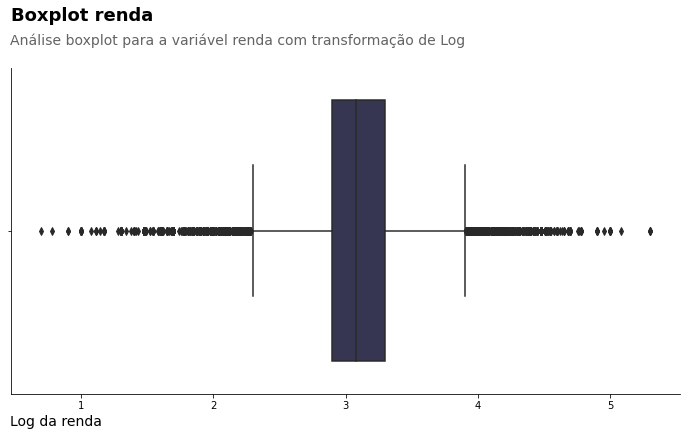

In [13]:
suptitle = 'Boxplot renda'
title = 'Análise boxplot para a variável renda com transformação de Log'

ax = sns.boxplot(x='Renda Log', data=df, orient='h', color='#191970', saturation=0.3256)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Log da renda', fontsize=14, horizontalalignment='left', x=-0.001)
ax.spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.grid(False)
plt.show()

<font size=2.85>Após a transformação da variável renda é possível perceber possíveis outliers nas duas pontas do gráfico, ou seja, temos pessoas com rendas bem altas e outras rendas extremamente baixas.Parece existir uma simetria nos dados. Os dados por serem muito dispersos, torna difícil a definição de valores extremos.</font></p>

## Análise de correlação

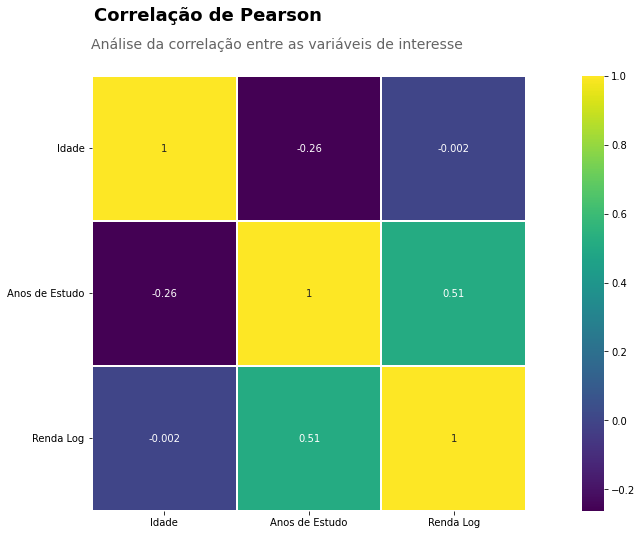

In [14]:
suptitle = 'Correlação de Pearson'
title = 'Análise da correlação entre as variáveis de interesse'

df['Anos de Estudo'] = df['Anos de Estudo'].map(map_anos_estudos)
corr = df.drop(['Estado', 'Sexo biologico', 'Raca', 'Renda'], axis=1).corr().round(3)

plt.figure(figsize=(20, 8))
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.viridis, linecolor='white', annot=True)
plt.suptitle(suptitle, fontsize=18, y=1., horizontalalignment='left', x=0.445, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0, ha='right')
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=2.85>Parece não existir correlação entre nossas variáveis, uma vez que todas possuem um grau de correlação bem fraco. O maior grau de correlação está associado a renda e aos anos de Estudo.</font></p>

## Gráficos de correlação

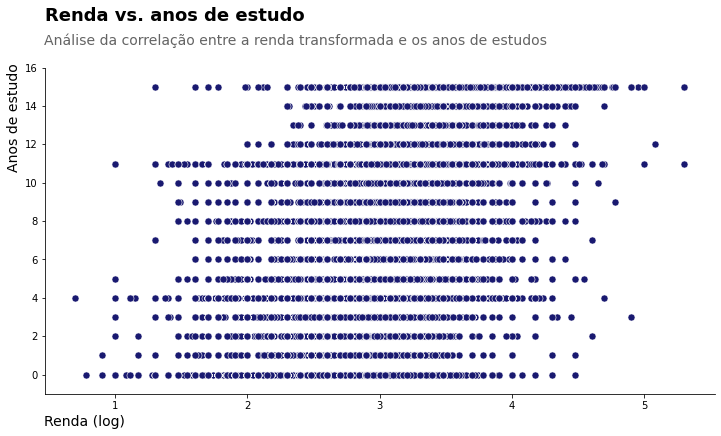

In [15]:
suptitle = 'Renda vs. anos de estudo'
title = 'Análise da correlação entre a renda transformada e os anos de estudos'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Renda Log', y='Anos de Estudo', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('Renda (log)', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Anos de estudo', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(-1, 16)
plt.show()

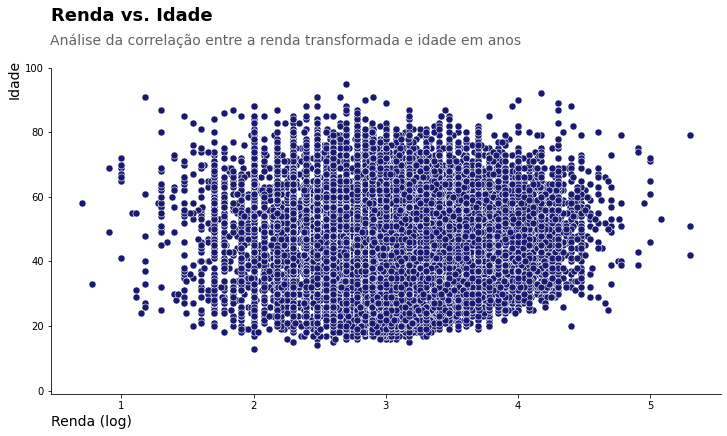

In [16]:
suptitle = 'Renda vs. Idade'
title = 'Análise da correlação entre a renda transformada e idade em anos'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Renda Log', y='Idade', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('Renda (log)', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Idade', fontsize=14, horizontalalignment='left', y=0.905)
plt.grid(False)
plt.ylim(-1, 100)
plt.show()

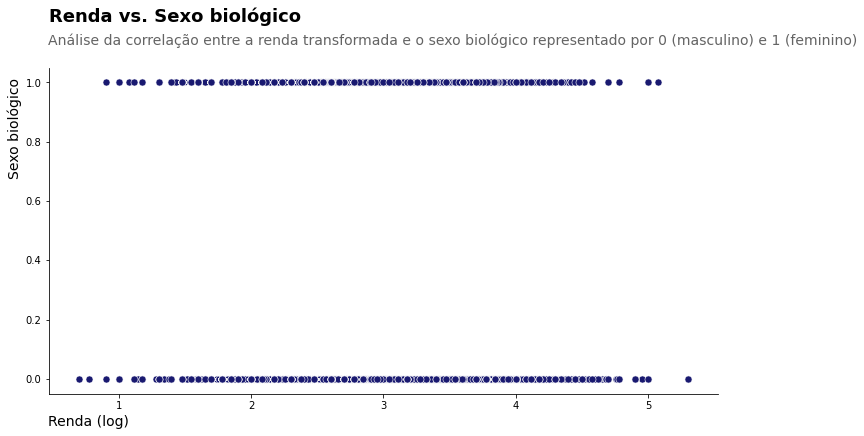

In [17]:
suptitle = 'Renda vs. Sexo biológico'
title = 'Análise da correlação entre a renda transformada e o sexo biológico representado por 0 (masculino) e 1 (feminino)'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Renda Log', y='Sexo biologico', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('Renda (log)', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Sexo biológico', fontsize=14, horizontalalignment='left', y=0.66)
plt.grid(False)
plt.show()

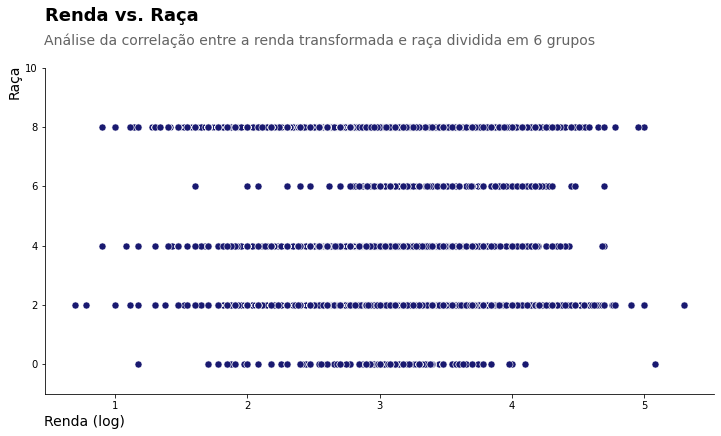

In [18]:
suptitle = 'Renda vs. Raça'
title = 'Análise da correlação entre a renda transformada e raça dividida em 6 grupos'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Renda Log', y='Raca', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('Renda (log)', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Raça', fontsize=14, horizontalalignment='left', y=0.905)
plt.grid(False)
plt.ylim(-1, 10)
plt.show()

<p style='text-align: justify;'><font size=2.85>Pelos gráficos é possível perceber a falta de correlação linear entre as variáveis. Nesse caso, iremos aplicar uma transformação não linear para podermos usar a regressão linear para prever a renda.</font></p>

# Análise de regressão

<p style='text-align: justify;'><font size=2.85>Após alguns testes e avaliando o resultado da regressão linear, percebemos que as variáveis significativas para predição da renda seriam apenas a idade e anos de estudo.</font></p>

Transformação polinomial

In [19]:
df.drop(['Estado', 'Sexo biologico', 'Raca', 'Renda Log'], axis=1, inplace=True)
poly_features = PolynomialFeatures (degree=2, include_bias=False)
df['Idade'] = df['Idade'].apply(lambda x:poly_features.fit_transform([[x]])[0][1])
df['Anos de Estudo'] = df['Anos de Estudo'].apply(lambda x:poly_features.fit_transform([[x]])[0][1])

Regressão linear

In [20]:
Y = df['Renda']
X = sm.add_constant(df[['Idade', 'Anos de Estudo']])
regressao = sm.OLS(Y, X, missing='drop').fit()
df['Renda prevista'] = regressao.predict()
df['Residuos'] = regressao.resid
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     7157.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:16:49   Log-Likelihood:            -7.2554e+05
No. Observations:               76840   AIC:                         1.451e+06
Df Residuals:                   76837   BIC:                         1.451e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -374.3902     29.174    -12.

### Variância dos resíduos

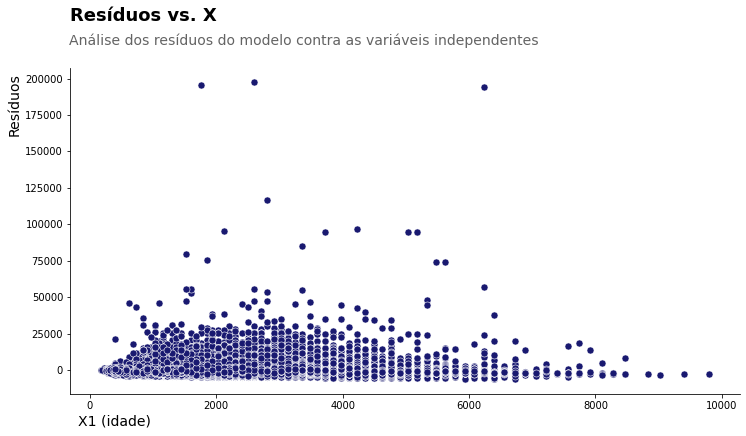

In [21]:
suptitle = 'Resíduos vs. X'
title = 'Análise dos resíduos do modelo contra as variáveis independentes'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Idade', y='Residuos', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('X1 (idade)', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Resíduos', fontsize=14, horizontalalignment='left', y=0.79)
plt.grid(False)
plt.show()

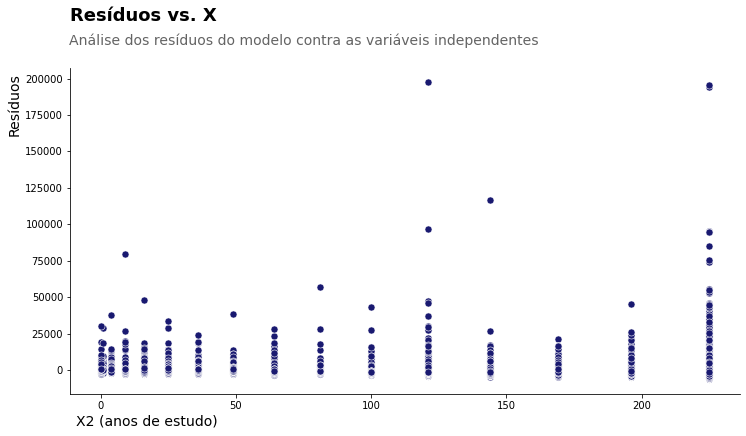

In [22]:
suptitle = 'Resíduos vs. X'
title = 'Análise dos resíduos do modelo contra as variáveis independentes'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Anos de Estudo', y='Residuos', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('X2 (anos de estudo)', fontsize=14, horizontalalignment='right', x=0.22)
plt.ylabel('Resíduos', fontsize=14, horizontalalignment='left', y=0.79)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=2.85>Analisando os gráficos acima, percebe-se que existe um padrão não linear entre os resíduos e as variáveis independente, ou seja, a variância apresenta comportamento diferente para os diferentes valores de X. Como não temos evidência de uma variância constante, o ideal seria usar outras variáveis ou um modelo de regressão não linear.</font></p>

### Normalidade dos resíduos

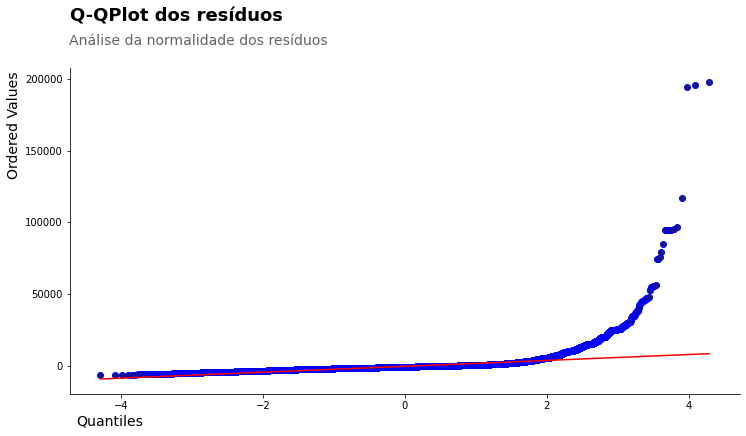

In [23]:
suptitle = 'Q-QPlot dos resíduos'
title = 'Análise da normalidade dos resíduos'

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(111)
fig = probplot(df['Residuos'], plot=plt)
ax.set_title("")
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
ax.spines[['top', 'right']].set_visible(False)
ax.get_lines()[0].set_markerfacecolor('#191970')
ax.get_lines()[1].set_markerfacecolor('#191970')
ax.set_xlabel('Quantiles', fontsize=14, horizontalalignment='right', x=0.11)
ax.set_ylabel('Ordered Values', fontsize=14, horizontalalignment='left', y=0.66)
plt.grid(False)
plt.show()